In [23]:
from SOM_plus_clustering.som import SOM
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [31]:
params_df = pd.read_csv("250k_rndm_zinc_drugs_clean_3.csv")
params_df = params_df[params_df["qed"] > 0.835714]
params_df = params_df[["logP", "SAS"]].reset_index().drop("index", axis=1)
params_df.shape

(62364, 2)

In [33]:
bonds_df = pd.read_csv("Atomic-Bond/Datas/cleared_data.csv")
elems_df = pd.read_csv("Elements\Datas\clear_encoded_data.csv")
fg_df = pd.read_csv("Functional-Group\Datas\clear_encoded_data.csv")
mw_df = pd.read_csv("Elements\Datas\molecular_weights.csv")
print(bonds_df.shape)
print(elems_df.shape)
print(fg_df.shape)
print(mw_df.shape)

(62364, 36)
(62364, 10)
(62364, 27)
(62364, 1)


In [34]:
frames = [bonds_df, elems_df, fg_df, mw_df, params_df]
result = pd.concat(frames, axis=1)
#check if there is any non null data
[i for i in result.isnull().sum() if i != 0]

[]

In [5]:
class minmaxscaler:
    def __init__(self, multiplier_value) -> None:
        self.multiplier = multiplier_value
        pass
    def fit(self, X):
        self.min_value = min(X)
        self.max_value = max(X)
        self.scale = 1/(self.max_value - self.min_value)
    def fit_transform(self, X):
        self.min_value = min(X)
        self.max_value = max(X)
        self.scale = 1/(self.max_value - self.min_value)
        return [(i - self.min_value)*self.scale*self.multiplier for i in X]
    def inverse_transform(self, X):
        return [i/self.scale/self.multiplier+self.min_value for i in X]

(array([  252.,  1731.,  5192.,  8981., 12045., 12718., 11929.,  7111.,
         2064.,   341.]),
 array([205.2579 , 226.01958, 246.78126, 267.54294, 288.30462, 309.0663 ,
        329.82798, 350.58966, 371.35134, 392.11302, 412.8747 ]),
 <BarContainer object of 10 artists>)

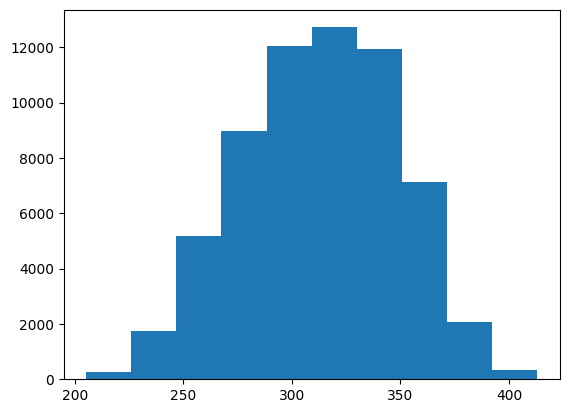

In [6]:
plt.hist(list(result["weight"]))

(array([  252.,  1731.,  5192.,  8981., 12045., 12718., 11929.,  7111.,
         2064.,   341.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

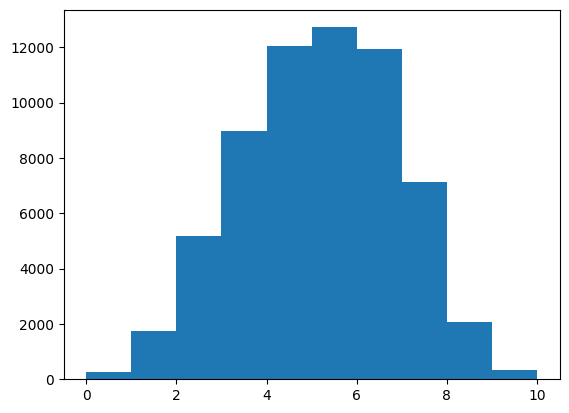

In [7]:
scaler = minmaxscaler(10)
rescaled_weight = scaler.fit_transform(list(result["weight"]))
plt.hist(rescaled_weight)

In [8]:
result["weight"] = rescaled_weight
result

,"('N', 'H', 1)","('N', 'N', 1)","('N', 'N', 1.5)","('S', 'O', 1)","('N', 'C', 1)","('N', 'C', 1.5)","('N', 'S', 1)","('C', 'N', 3)","('S', 'H', 1)","('C', 'S', 1)",...,nitroso,phospate,phospite,isothio,thioamide,aromatic,cycle,weight,logP,SAS
0,2,1,0,0,7,2,0,0,0,0,...,0,0,0,0,0,1,2,3.907473,3.11370,3.432004
1,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,0,2,2,5.974141,2.37940,2.733200
2,1,0,0,0,4,0,1,0,0,1,...,0,0,0,0,0,2,1,7.376643,2.69566,2.595621
3,1,0,0,0,2,2,0,1,0,0,...,0,0,0,0,0,2,2,3.375295,3.26928,3.918602
4,1,0,0,0,2,5,0,0,0,0,...,0,0,0,0,0,2,1,5.977079,1.79382,3.449086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62359,1,0,0,0,3,3,0,0,1,0,...,0,0,0,0,0,2,2,6.269820,2.11680,4.320638
62360,1,0,1,0,3,2,0,0,0,0,...,0,0,0,0,0,2,1,7.994840,2.87480,4.217729
62361,2,0,0,0,2,4,0,0,0,0,...,0,0,0,0,0,2,1,2.363995,2.17860,4.007543
62362,1,0,0,0,5,0,0,0,0,0,...,0,0,0,0,0,2,0,4.386625,2.90054,1.840642


In [9]:
X = result.values
pca = PCA(n_components=0.9)
pca.fit(X)
transformed_data = pca.transform(X)
transformed_data.shape

(62364, 6)

In [10]:
pca.explained_variance_ratio_

array([0.60621496, 0.13593798, 0.06669061, 0.03871998, 0.03070293,
       0.02290543])

In [11]:
sum(pca.explained_variance_ratio_)

0.9011718822892972

In [12]:
pd.DataFrame(transformed_data)

,0,1,2,3,4,5
0,4.692828,-3.175565,1.792651,-1.119476,-2.380266,0.121315
1,-5.159448,5.531795,-0.914257,3.898985,-1.507691,-1.713257
2,0.823478,6.830245,-0.003909,0.101273,-0.809989,0.705250
3,-4.882908,2.076129,-1.969053,2.562727,-4.590018,-0.554441
4,3.293239,0.590752,-2.389189,1.662129,-0.156399,4.007400
...,...,...,...,...,...,...
62359,6.256996,-2.757040,-2.802186,1.578081,-0.191571,3.199628
62360,1.767147,0.674334,-1.358751,1.172379,0.207372,2.850247
62361,-2.606135,-0.083240,-2.281400,-1.352041,-4.209428,1.132468
62362,-2.537912,6.008310,1.344771,-1.638640,-1.306766,-1.362117


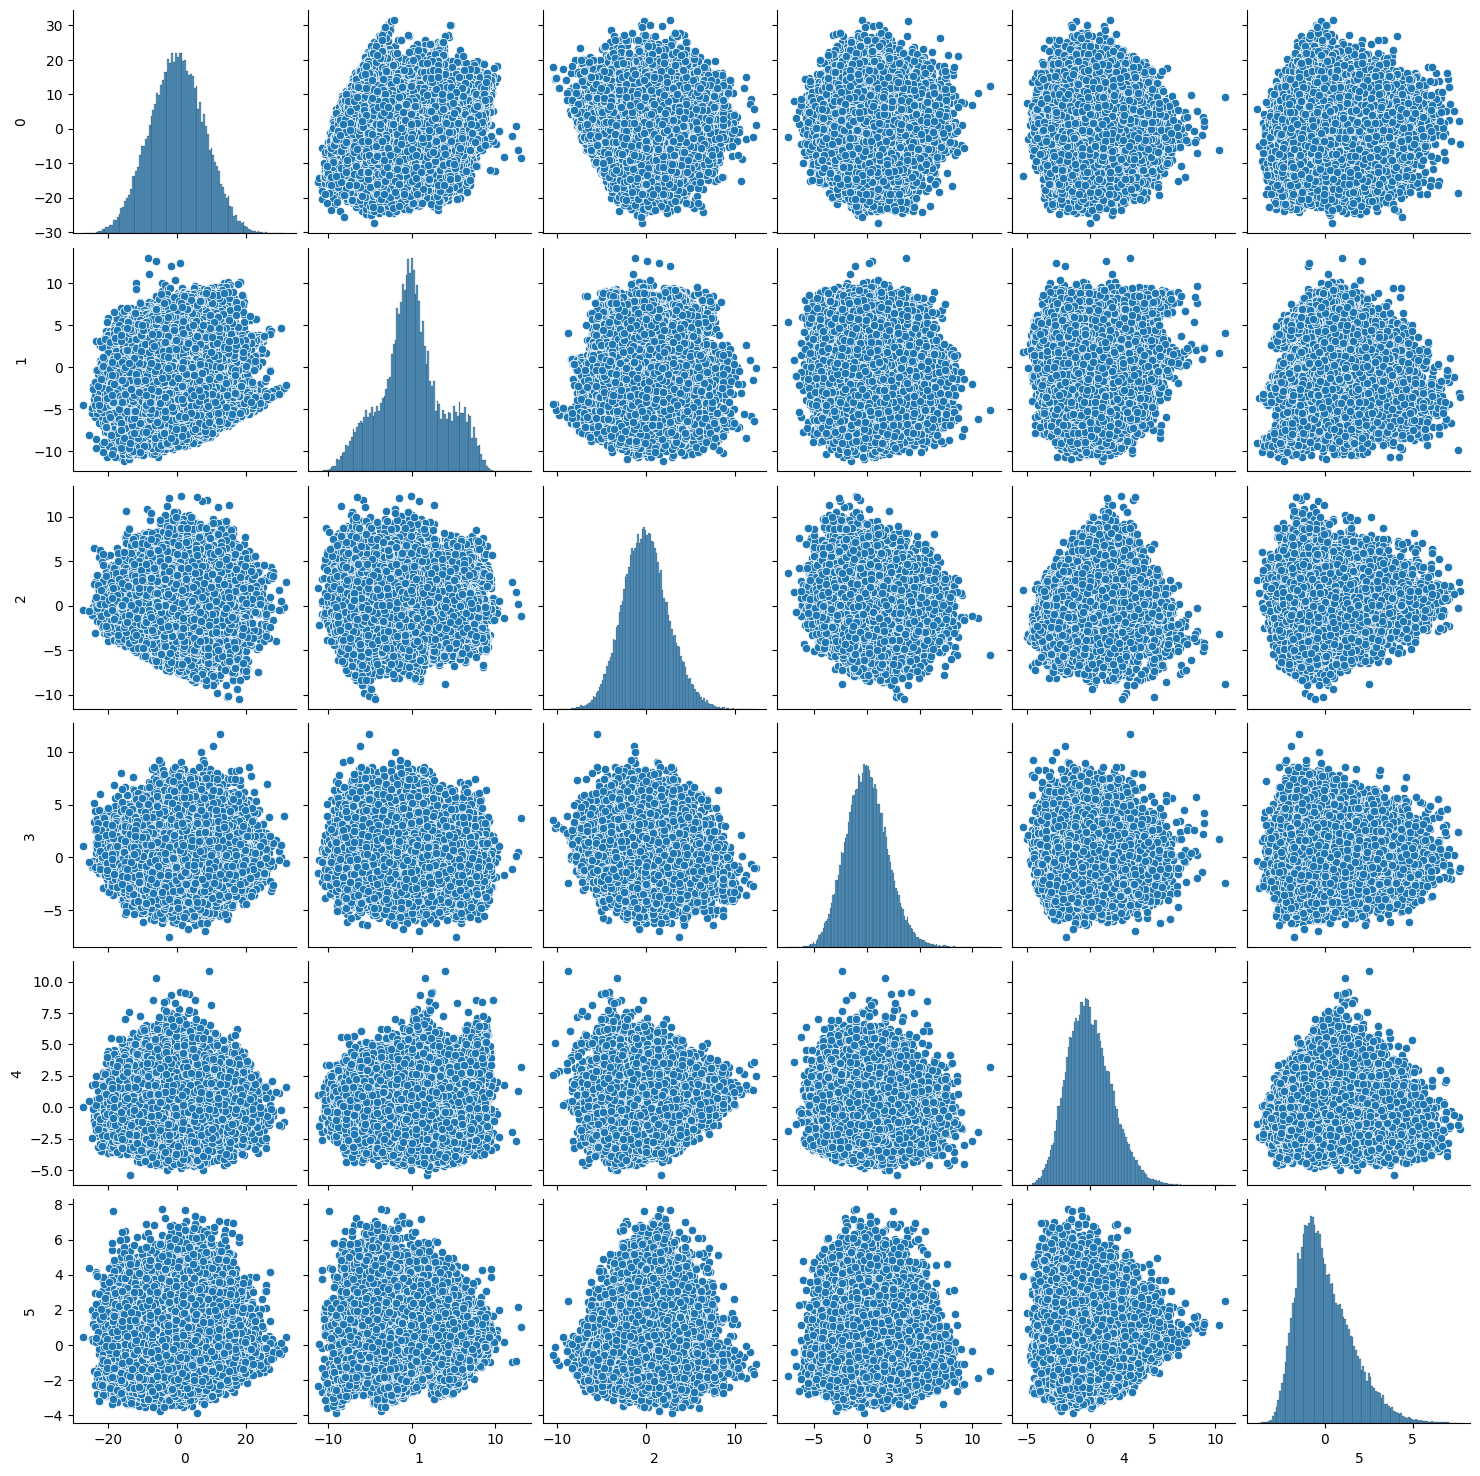

In [13]:
pca_df = pd.DataFrame(transformed_data)
sns.pairplot(pca_df)

Training   | [██████████████████████████████████████- ] 96% 

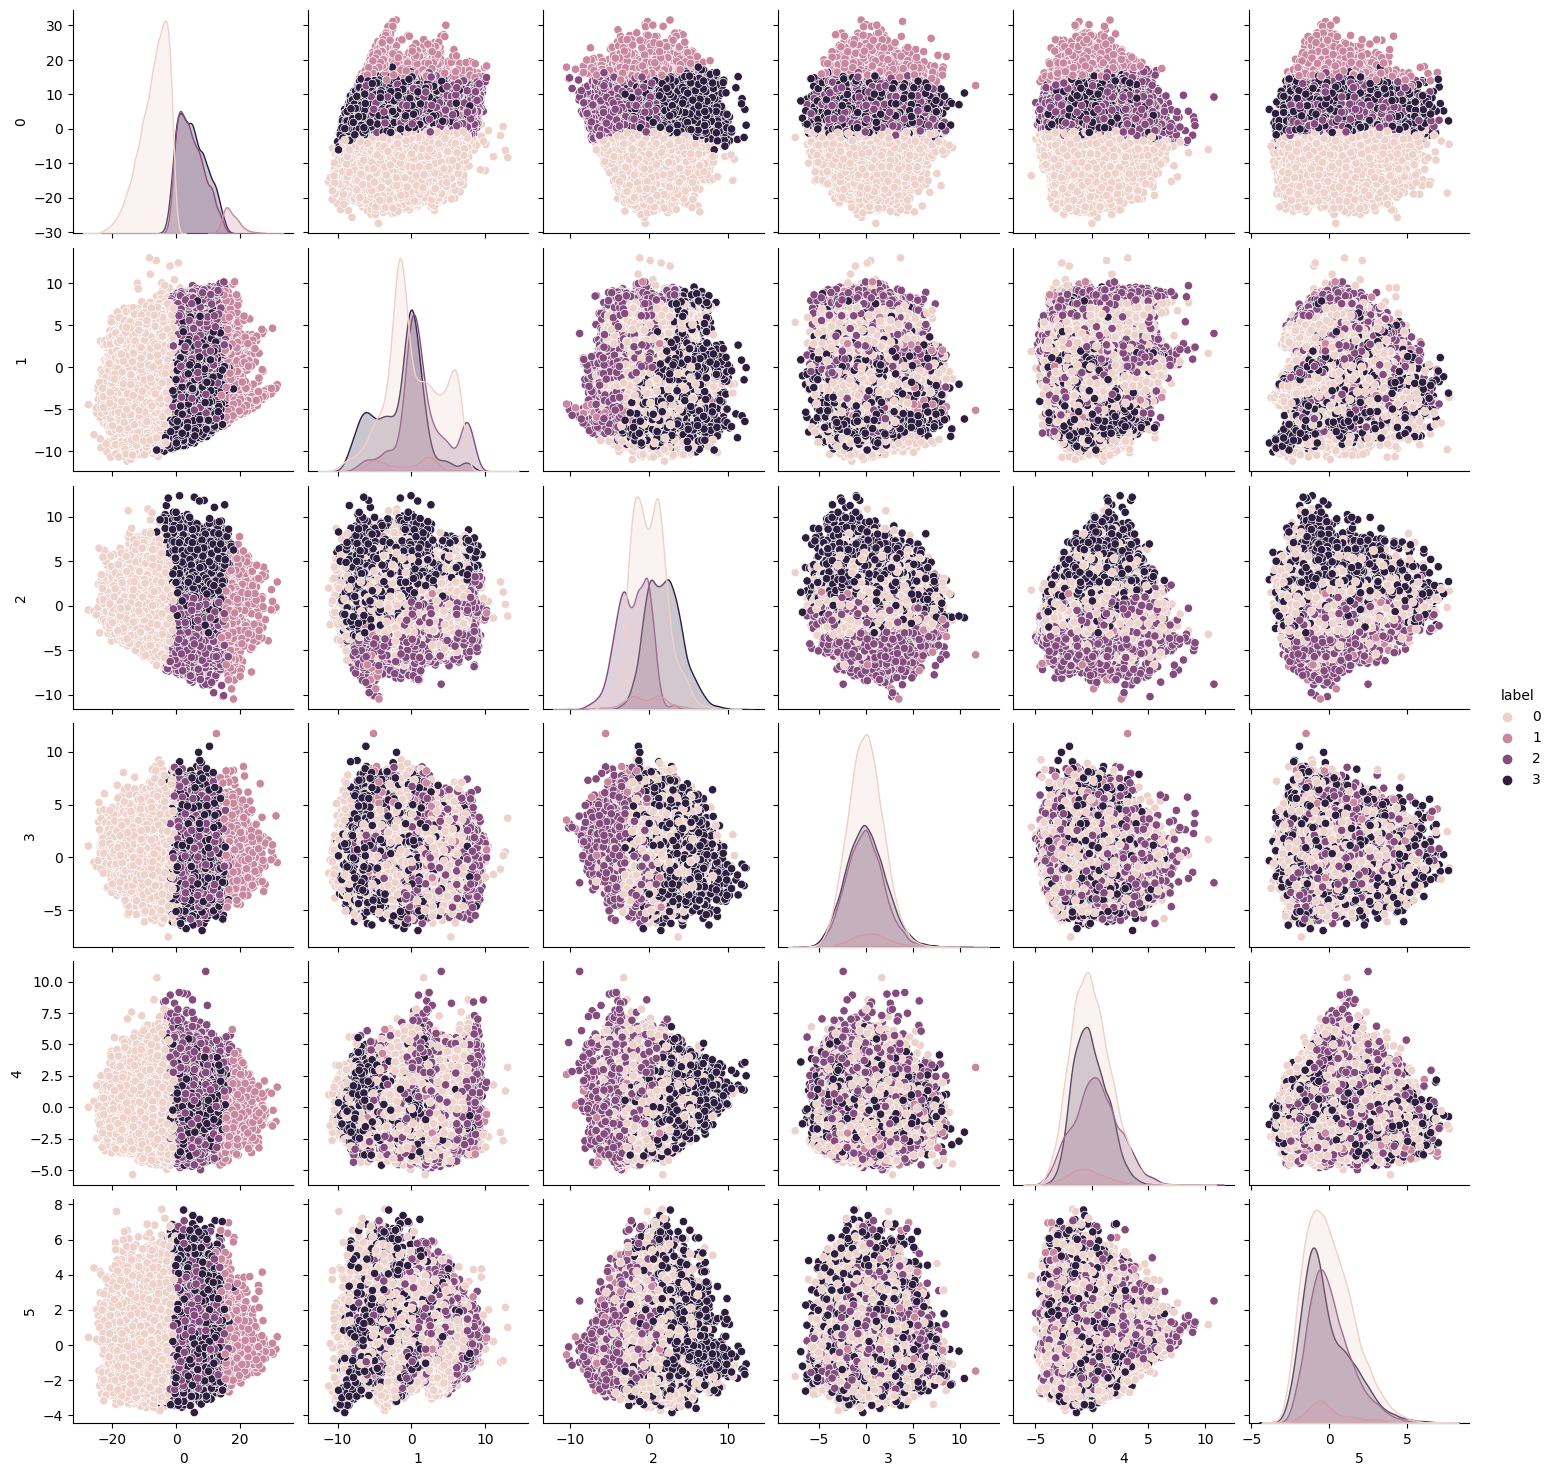

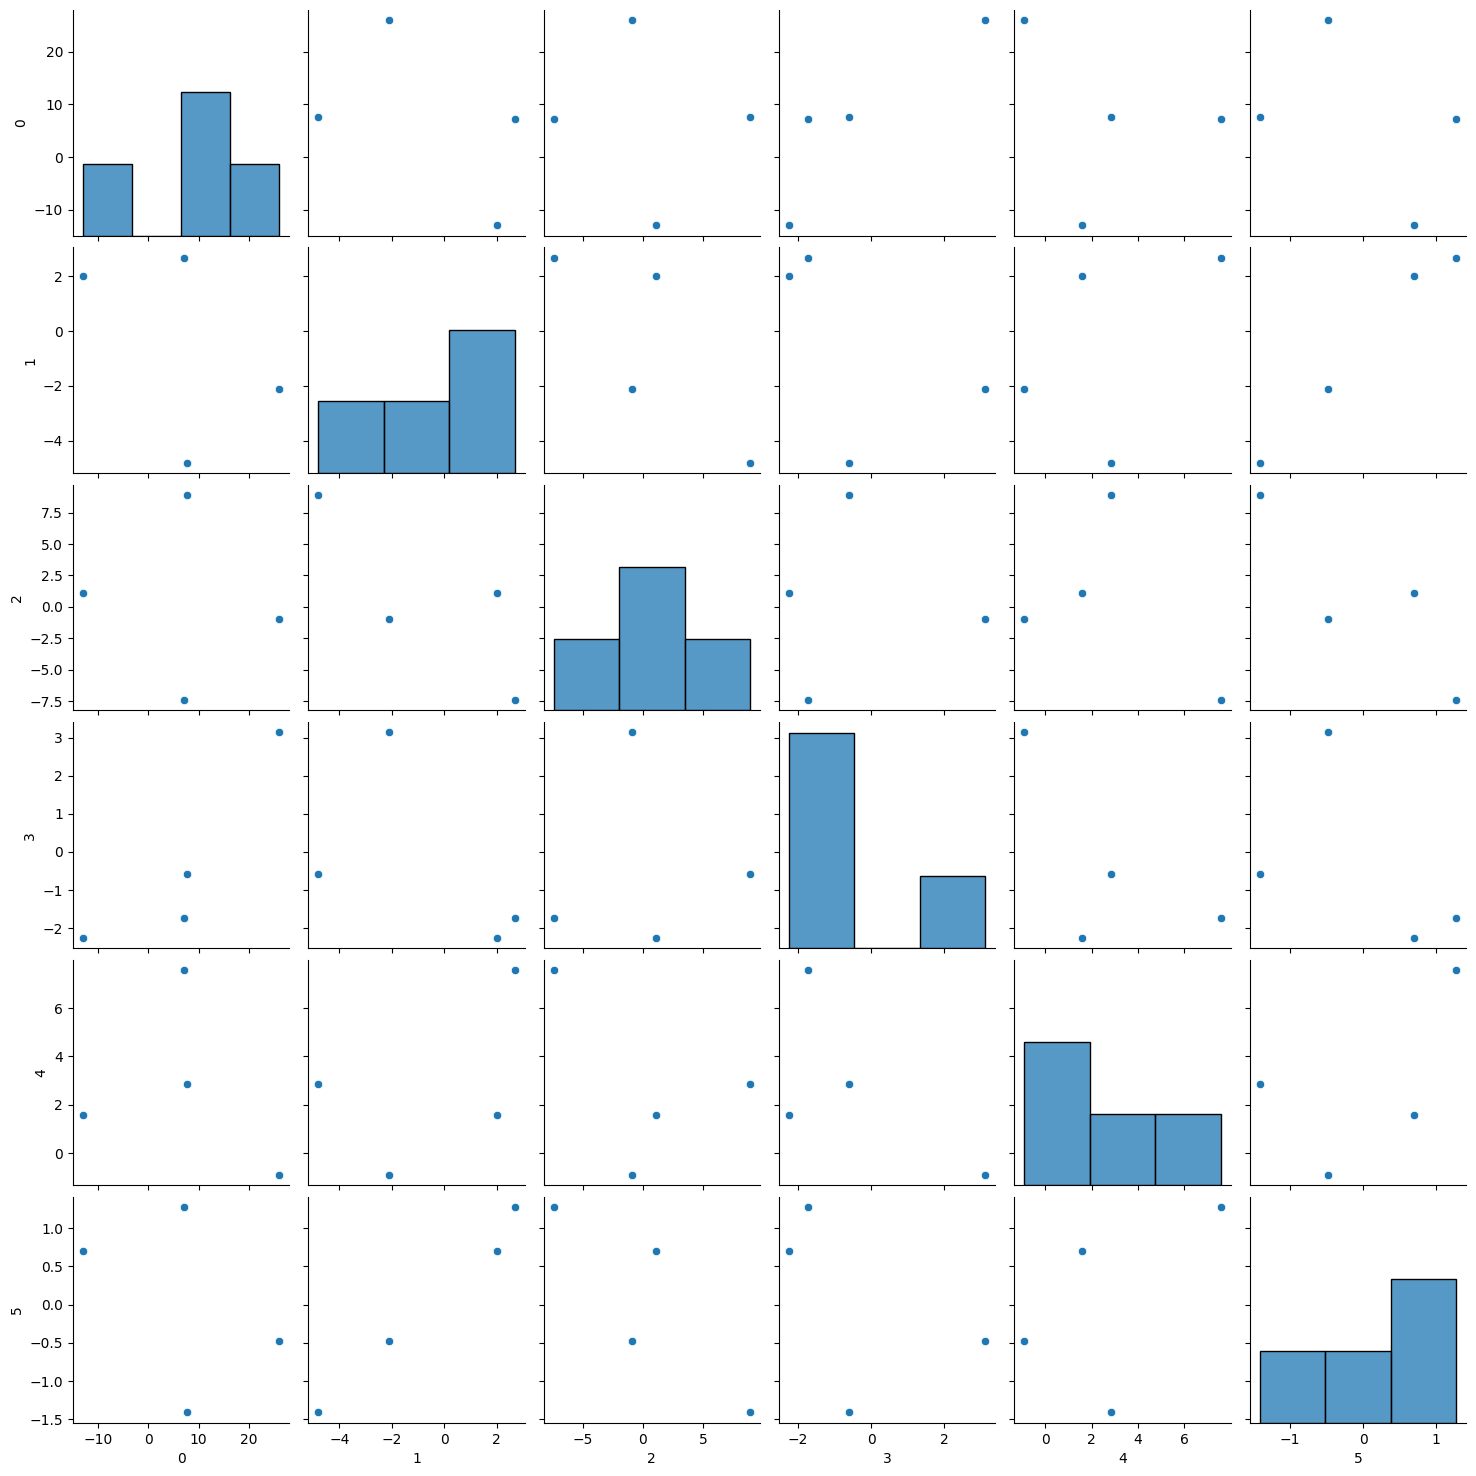

In [14]:
X = transformed_data
clustering_model = SOM(m = 1,
                    n = 4, 
                    dim=X.shape[1],
                    max_iter=None,
                    initiate_method="SOM++",
                    learning_rate=0.3,
                    neighbour_rad=1)
clustering_model.fit(X, epoch=30)
pred = clustering_model.predict(X)
plot_df = pd.DataFrame(pca_df)
plot_df["label"] = pred
sns.pairplot(plot_df, hue="label", corner=False)
sns.pairplot(pd.DataFrame(clustering_model.cluster_center_))

In [1]:
cluster_data = pd.DataFrame(pca.inverse_transform( clustering_model.cluster_center_), columns=result.columns)
cluster_data["weight"] = scaler.inverse_transform(list(cluster_data["weight"]))
converted_cluster = cluster_data[cluster_data > 0.05].dropna(axis=1)
converted_cluster.columns

NameError: name 'pd' is not defined

In [16]:
converted_cluster.to_csv("reduced_cluster_center_data.csv")
converted_cluster.round(3).to_excel("reduced_cluster_center_data.xlsx")

In [17]:
cluster_data.to_csv("cluster_center_data.csv")
cluster_data.round(3).to_excel("cluster_center_data.xlsx")

In [18]:
result["weight"] = scaler.inverse_transform(list(result["weight"]))

In [19]:
result["label"] = pred
result

,"('N', 'H', 1)","('N', 'N', 1)","('N', 'N', 1.5)","('S', 'O', 1)","('N', 'C', 1)","('N', 'C', 1.5)","('N', 'S', 1)","('C', 'N', 3)","('S', 'H', 1)","('C', 'S', 1)",...,phospate,phospite,isothio,thioamide,aromatic,cycle,weight,logP,SAS,label
0,2,1,0,0,7,2,0,0,0,0,...,0,0,0,0,1,2,286.3836,3.11370,3.432004,0
1,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,2,2,329.2911,2.37940,2.733200,3
2,1,0,0,0,4,0,1,0,0,1,...,0,0,0,0,2,1,358.4094,2.69566,2.595621,3
3,1,0,0,0,2,2,0,1,0,0,...,0,0,0,0,2,2,275.3347,3.26928,3.918602,0
4,1,0,0,0,2,5,0,0,0,0,...,0,0,0,0,2,1,329.3521,1.79382,3.449086,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62359,1,0,0,0,3,3,0,0,1,0,...,0,0,0,0,2,2,335.4299,2.11680,4.320638,3
62360,1,0,1,0,3,2,0,0,0,0,...,0,0,0,0,2,1,371.2442,2.87480,4.217729,3
62361,2,0,0,0,2,4,0,0,0,0,...,0,0,0,0,2,1,254.3384,2.17860,4.007543,3
62362,1,0,0,0,5,0,0,0,0,0,...,0,0,0,0,2,0,296.3316,2.90054,1.840642,2


In [20]:
result.to_csv("labeled_data.csv", index=False)

In [21]:
lc_df = pd.DataFrame([pred.count(i) for i in np.unique(pred)], columns=["count"])
lc_df.to_csv("label_count.csv")
lc_df.to_excel("label_count.xlsx")
lc_df

,count
0,27380
1,1880
2,15535
3,17569


In [22]:
import os
import glob

path = 'Stats/Distribution/'

files = glob.glob(path + '*')
for f in files:
    os.remove(f)
for columns in converted_cluster.columns:
    bin = int(np.max(result[columns]))
    sns.histplot(x = result[columns], kde=True, bins=bin)
    plt.savefig(path+"/{}.png".format(columns))
    plt.clf()

<Figure size 640x480 with 0 Axes>

In [29]:
pickle.dump(clustering_model, open('models/som_model.models','wb'))
pickle.dump(pca, open('models/pca.models','wb'))